In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from statsmodels.graphics.mosaicplot import mosaic

In [2]:
data=pd.read_csv("EV_dataset.csv")

In [3]:
data.head()

,Names,gender,age,education,income,employment,state
0,Aadhya,F,25,graguate,650000,yes,Maharashtra
1,Aaliyah,F,32,10th,950000,yes,Uttar Pradesh
2,Aaradhya,F,28,postgraguate,1100000,yes,Rajasthan
3,Aaryan,M,25,12th,300000,yes,Harayana
4,Abhinav,M,32,10th,360000,yes,Uttar Pradesh


In [4]:
data.shape

(249, 7)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Names       249 non-null    object
 1   gender      249 non-null    object
 2   age         249 non-null    int64 
 3   education   249 non-null    object
 4   income      249 non-null    int64 
 5   employment  249 non-null    object
 6   state       249 non-null    object
dtypes: int64(2), object(5)
memory usage: 13.7+ KB


Text(0.5, 1.0, 'State wise distribution')

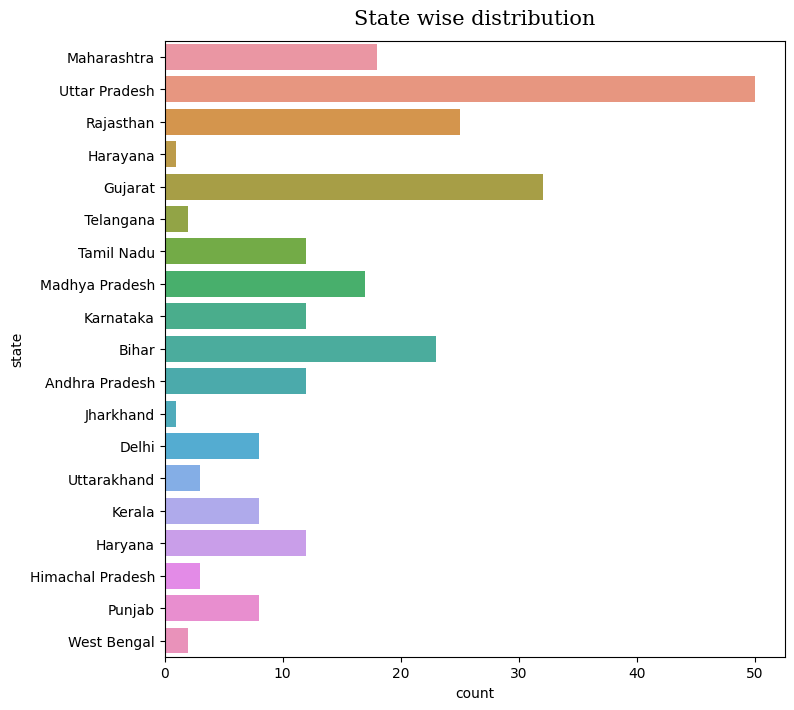

In [6]:
fig = plt.figure(figsize=(8,8))
sns.countplot(y="state", data=data)
plt.title(label="State wise distribution",weight=200, family='serif', size=15, pad=12)

Text(0.5, 1.0, 'Distribution based on employment')

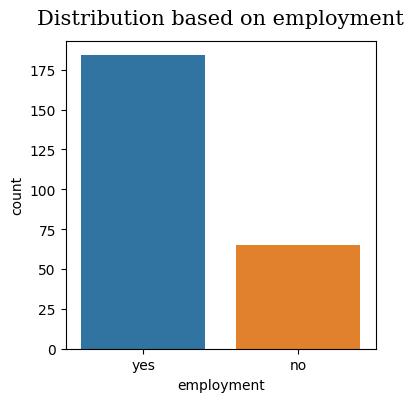

In [7]:
fig = plt.figure(figsize=(4,4))
sns.countplot(x="employment", data=data)
plt.title(label="Distribution based on employment",weight=200, family='serif', size=15, pad=12)

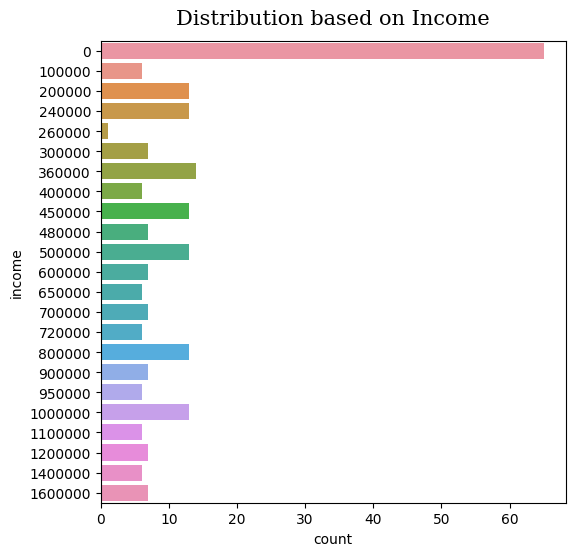

In [8]:
fig = plt.figure(figsize=(6,6))
sns.countplot(y="income", data=data)
plt.title(label="Distribution based on Income",weight=200, family='serif', size=15, pad=12)

Text(0.5, 1.0, 'Distribution based on Gender')

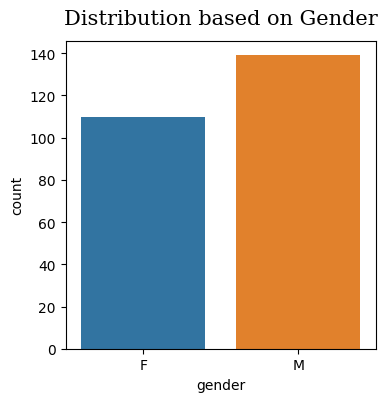

In [10]:
fig = plt.figure(figsize=(4,4))
sns.countplot(x="gender", data=data)
plt.title(label="Distribution based on Gender",weight=200, family='serif', size=15, pad=12)

Text(0.5, 1.0, 'Distribution based on Age')

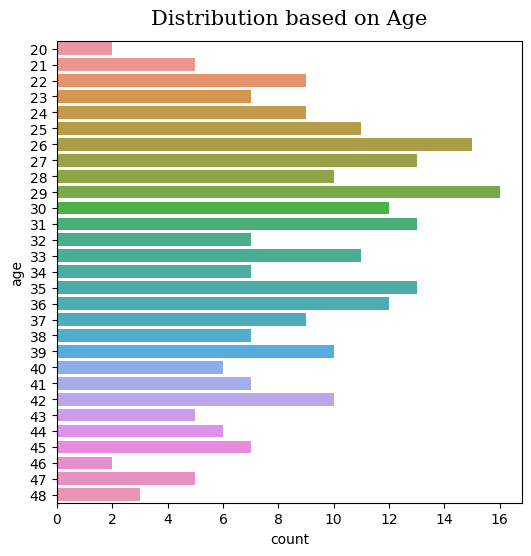

In [11]:
fig = plt.figure(figsize=(6,6))
sns.countplot(y="age", data=data)
plt.title(label="Distribution based on Age",weight=200, family='serif', size=15, pad=12)

Text(0.5, 1.0, 'Distribution based on qualification')

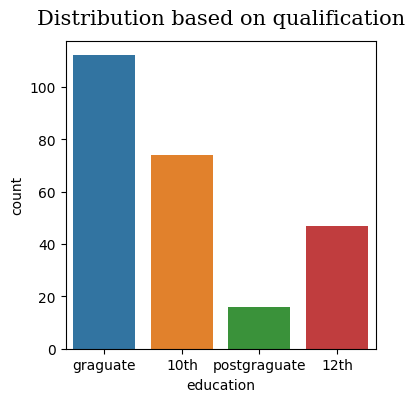

In [12]:
fig = plt.figure(figsize=(4,4))
sns.countplot(x="education", data=data)
plt.title(label="Distribution based on qualification",weight=200, family='serif', size=15, pad=12)

In [13]:
data2=pd.read_csv("electric_vehicle_charging_station_list.csv")

In [14]:
data2.head()

,no,region,address,aux addres,latitude,longitude,type,power,service
0,1,NDMC,"Prithviraj Market, Rabindra Nagar, New Delhi- ...","Electric Vehicle Charger, Prithviraj Market, R...",28.600725,77.226252,DC-001,15 kW,Self Service
1,2,NDMC,"Prithviraj Market, Rabindra Nagar, New Delhi- ...","Electric Vehicle Charger, Prithviraj Market, R...",28.600725,77.226252,DC-001,15 kW,Self Service
2,3,NDMC,"Outside RWA Park, Jor Bagh Market, Jor Bagh Co...","Electric Vehicle Charger, Outside RWA Park, Jo...",28.588303,77.217697,DC-001,15 kW,Self Service
3,4,NDMC,"Opposite Dory Pharmacy, Khanna Market, Aliganj...","Electric Vehicle Charger, Opposite Dory Pharma...",28.582654,77.220087,DC-001,15 kW,Self Service
4,5,NDMC,"Opposite Goel Opticals, Khanna Market, Aliganj...","Electric Vehicle Charger, Opposite Goel Optica...",28.584485,77.220316,DC-001,15 kW,Self Service


In [15]:
data2.shape

(202, 9)

Text(0.5, 1.0, 'No of charging stations vs Region')

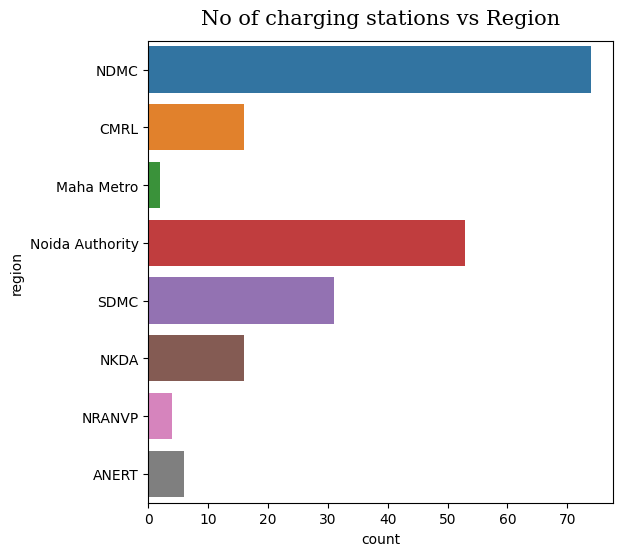

In [16]:
fig = plt.figure(figsize=(6,6))
sns.countplot(y="region", data=data2)
plt.title(label="No of charging stations vs Region",weight=200, family='serif', size=15, pad=12)

Text(0.5, 1.0, 'No of charging stations vs Power')

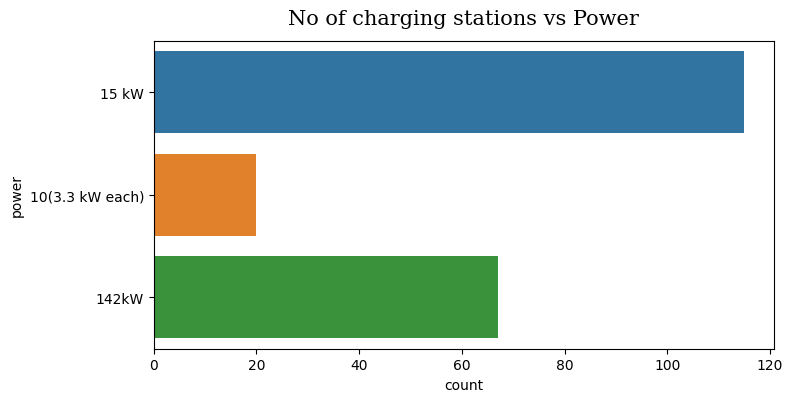

In [17]:
fig = plt.figure(figsize=(8,4))
sns.countplot(y="power", data=data2)
plt.title(label="No of charging stations vs Power",weight=200, family='serif', size=15, pad=12)

Text(0.5, 1.0, 'No of charging stations vs Type')

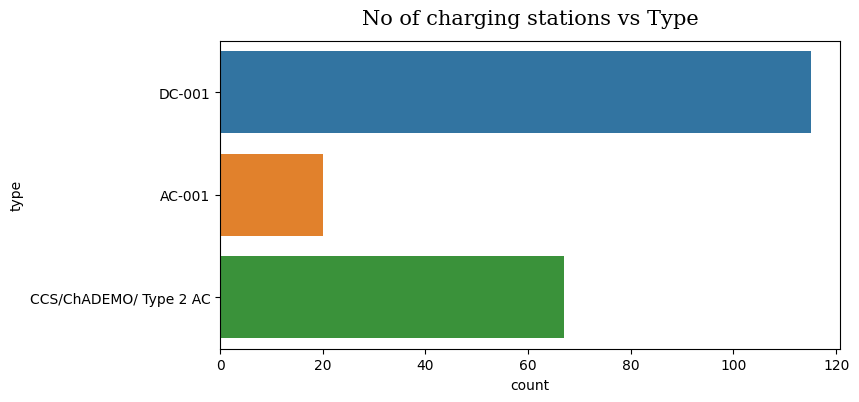

In [18]:
fig = plt.figure(figsize=(8,4))
sns.countplot(y="type", data=data2)
plt.title(label="No of charging stations vs Type",weight=200, family='serif', size=15, pad=12)

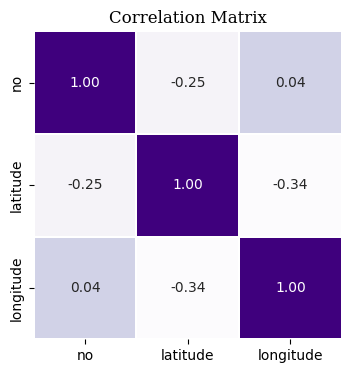

In [19]:
plt.figure(figsize=(4,4))
sns.heatmap(data=data2.corr(), annot=True, cmap='Purples', cbar=False, square=True, fmt='.2f', linewidths=.3)
plt.title('Correlation Matrix', family='serif');

In [20]:
df=data2.drop(['no'], axis=1)

In [21]:
df.replace({'AC-001': 1, 'DC-001':2,'CCS/ChADEMO/ Type 2 AC':3}, inplace=True)
df.replace({'15 kW': 1, '10(3.3 kW each)':2,'142kW':3}, inplace=True)

In [22]:
# select relevant features for clustering
features = ['latitude', 'longitude']
kmeans = KMeans(n_clusters=5)
kmeans.fit(df[features])
df['cluster'] = kmeans.labels_

# examine cluster assignments
print(df.groupby('cluster').mean())


          latitude  longitude      type     power
cluster                                          
0        28.591800  77.256729  2.322785  1.778481
1        13.024369  80.195948  2.000000  1.750000
2        22.582627  88.468056  1.500000  1.500000
3        21.127011  80.421806  1.750000  1.250000
4         9.049377  76.695243  2.625000  2.250000


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [23]:
df.head()

,region,address,aux addres,latitude,longitude,type,power,service,cluster
0,NDMC,"Prithviraj Market, Rabindra Nagar, New Delhi- ...","Electric Vehicle Charger, Prithviraj Market, R...",28.600725,77.226252,2,1,Self Service,0
1,NDMC,"Prithviraj Market, Rabindra Nagar, New Delhi- ...","Electric Vehicle Charger, Prithviraj Market, R...",28.600725,77.226252,2,1,Self Service,0
2,NDMC,"Outside RWA Park, Jor Bagh Market, Jor Bagh Co...","Electric Vehicle Charger, Outside RWA Park, Jo...",28.588303,77.217697,2,1,Self Service,0
3,NDMC,"Opposite Dory Pharmacy, Khanna Market, Aliganj...","Electric Vehicle Charger, Opposite Dory Pharma...",28.582654,77.220087,2,1,Self Service,0
4,NDMC,"Opposite Goel Opticals, Khanna Market, Aliganj...","Electric Vehicle Charger, Opposite Goel Optica...",28.584485,77.220316,2,1,Self Service,0


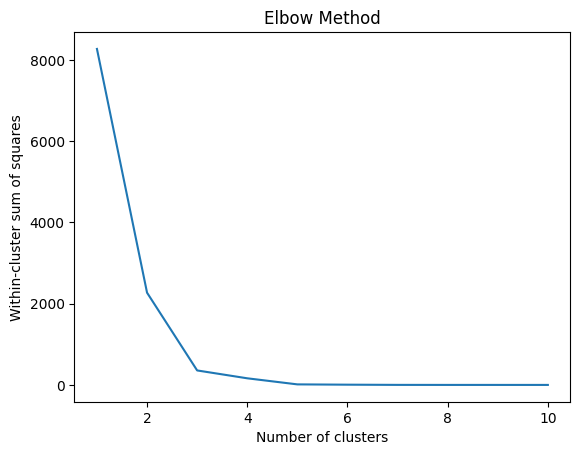

In [24]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df[features])
    wcss.append(kmeans.inertia_)

# plot within-cluster sum of squares for different k values
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of squares')
plt.show()

In [25]:
data.head()

,Names,gender,age,education,income,employment,state
0,Aadhya,F,25,graguate,650000,yes,Maharashtra
1,Aaliyah,F,32,10th,950000,yes,Uttar Pradesh
2,Aaradhya,F,28,postgraguate,1100000,yes,Rajasthan
3,Aaryan,M,25,12th,300000,yes,Harayana
4,Abhinav,M,32,10th,360000,yes,Uttar Pradesh


In [26]:
# segment customers based on age
age_groups = []
for age in data['age']:
    if age < 18:
        age_groups.append('Under 18')
    elif age >= 18 and age < 35:
        age_groups.append('18-34')
    elif age >= 35 and age < 50:
        age_groups.append('35-49')
    else:
        age_groups.append('50+')

# add age groups to customer data
data['age_group'] = age_groups



In [27]:
# segment customers based on income
income_groups = []
for income in data['income']:
    if income < 250000:
        income_groups.append('Under 250K')
    elif income >= 250000 and income < 500000:
        income_groups.append('250K-500K')
    elif income >= 500000 and income < 750000:
        income_groups.append('500K-750K')
    else:
        income_groups.append('750K+')

# add income groups to customer data
data['income_group'] = income_groups



In [28]:
data.head()

,Names,gender,age,education,income,employment,state,age_group,income_group
0,Aadhya,F,25,graguate,650000,yes,Maharashtra,18-34,500K-750K
1,Aaliyah,F,32,10th,950000,yes,Uttar Pradesh,18-34,750K+
2,Aaradhya,F,28,postgraguate,1100000,yes,Rajasthan,18-34,750K+
3,Aaryan,M,25,12th,300000,yes,Harayana,18-34,250K-500K
4,Abhinav,M,32,10th,360000,yes,Uttar Pradesh,18-34,250K-500K


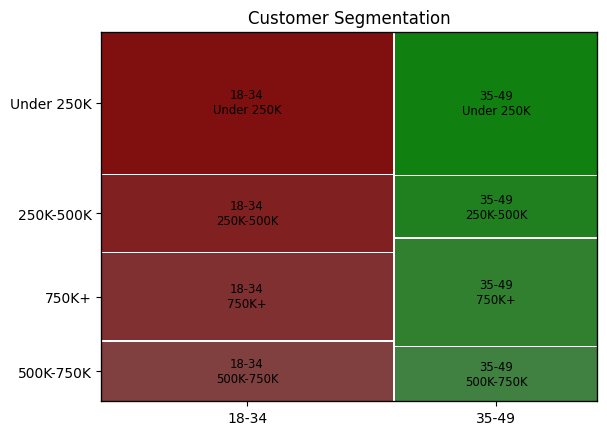

In [29]:
from statsmodels.graphics.mosaicplot import mosaic
mosaic(data, ['age_group', 'income_group'], title='Customer Segmentation')
plt.show()

In [30]:
# segment customers based on gender
gender_groups = []
for gender in data['gender']:
    if gender == 'M':
        gender_groups.append('Male')
    elif gender == 'F':
        gender_groups.append('Female')
    else:
        gender_groups.append('Other')



In [31]:
# add gender groups to customer data
data['gender_group'] = gender_groups

# segment customers based on employment status
employment_groups = []
for employment in data['employment']:
    if employment == 'yes':
        employment_groups.append('employed')
    else:
        employment_groups.append('Unemployed')

# add employment groups to customer data
data['employment_group'] = employment_groups



In [32]:
data.tail()

,Names,gender,age,education,income,employment,state,age_group,income_group,gender_group,employment_group
244,Sudhanshu,M,48,12th,1400000,yes,Uttar Pradesh,35-49,750K+,Male,employed
245,Sumit,M,23,graguate,500000,yes,Gujarat,18-34,500K-750K,Male,employed
246,Sunil,M,42,graguate,400000,yes,Bihar,35-49,250K-500K,Male,employed
247,Suresh,M,29,graguate,360000,yes,Haryana,18-34,250K-500K,Male,employed
248,Uday,M,36,12th,450000,yes,Madhya Pradesh,35-49,250K-500K,Male,employed


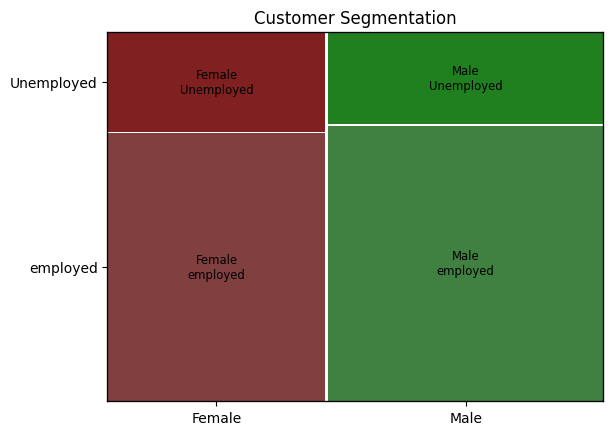

In [33]:
from statsmodels.graphics.mosaicplot import mosaic
mosaic(data, ['gender_group', 'employment_group'], title='Customer Segmentation')
plt.show()

In [34]:
state_groups = []
for state in data['state']:
    if state in ['Maharashtra', 'Gujarat', 'Goa']:
        state_groups.append('West')
    elif state in ['Delhi', 'Uttar Pradesh', 'Haryana']:
        state_groups.append('North')
    elif state in ['Tamil Nadu', 'Karnataka', 'Kerala']:
        state_groups.append('South')
    elif state in ['Rajasthan', 'Madhya Pradesh', 'Chhattisgarh']:
        state_groups.append('Central')
    else:
        state_groups.append('Other')

# add state groups to customer data
data['state_group'] = state_groups

# select market segment
market_segment = data.loc[data['state_group'] == 'West']

# view selected market segment
market_segment.head()

,Names,gender,age,education,income,employment,state,age_group,income_group,gender_group,employment_group,state_group
0,Aadhya,F,25,graguate,650000,yes,Maharashtra,18-34,500K-750K,Female,employed,West
5,Abhishek,M,28,12th,450000,yes,Gujarat,18-34,250K-500K,Male,employed,West
15,Akshara,F,26,graguate,240000,yes,Gujarat,18-34,Under 250K,Female,employed,West
18,Amaira,F,33,10th,0,no,Maharashtra,18-34,Under 250K,Female,Unemployed,West
23,Amit,M,29,10th,240000,yes,Gujarat,18-34,Under 250K,Male,employed,West


<Figure size 1200x1200 with 0 Axes>

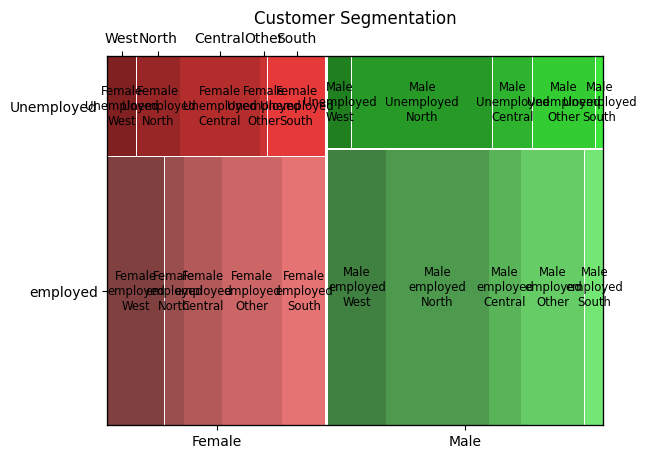

In [39]:
plt.figure(figsize=(12,12))
from statsmodels.graphics.mosaicplot import mosaic
mosaic(data, ['gender_group', 'employment_group','state_group'], title='Customer Segmentation')
plt.show()